In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
sns.set_style("white")

In [2]:
## load raw datasets
dir_path = os.getcwd()
dmg = pd.read_csv(dir_path + "/combined_data.csv")

In [3]:
dmg

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,asthma,...,bd,st,fever,ftg,mp,loss_of_smell,test_status,pneumonia,diarrhoea,cld
0,DRBAZX64nuVtqBQf13gH7r36Mh52,26,healthy,y,female,United States,Madison,Wisconsin,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jw7YMfwGqMX22UbHh1TTgYMTYWs1,16,healthy,y,female,India,24 pargana,West Bengal,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,xa2v8z3Yzgb9dFrq2gEZz6oS7fh1,26,resp_illness_not_identified,y,male,India,Kolkata,West Bengal,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xwHQrG0KwjTLJvBYVtVXfHp4JAd2,32,resp_illness_not_identified,y,male,Sri Lanka,Sri Jatawardanapura,Western Province,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,xKW2EpGmJcfigLecUTLVXEWQHPg2,22,healthy,y,male,India,Kolkata,West Bengal,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,Sy1VK1UgX0ZMcMJitgPal1sp8jj2,20,healthy,y,female,India,Bangalore,Karnataka,n,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499,4drDZUlQcteX5StlFT2CXEL0N0L2,57,healthy,y,male,India,bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,qSDQMZj4iqhaRUz1SvwiUqyUzKH3,52,healthy,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1501,vX3NZt9tyQUhXgS4dlz55VGEMdU2,55,healthy,y,male,India,NaN,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# print the number of subjects for each covid status
sts = np.unique(dmg.covid_status)
for st in sts:
    subj = dmg.loc[dmg['covid_status']==st]
    print(st, len(subj.index))

healthy 1198
no_resp_illness_exposed 97
positive_asymp 14
positive_mild 84
positive_moderate 10
recovered_full 23
resp_illness_not_identified 77


In [4]:
# regroup the positive cases together
dmg.loc[(dmg['covid_status']=='healthy'),'status_regroup'] = 'healthy'
dmg.loc[(dmg['covid_status']=='no_resp_illness_exposed'),'status_regroup'] = 'exposed'
dmg.loc[(dmg['covid_status']=='positive_asymp'),'status_regroup'] = 'positive'
dmg.loc[(dmg['covid_status']=='positive_mild'),'status_regroup'] = 'positive'
dmg.loc[(dmg['covid_status']=='positive_moderate'),'status_regroup'] = 'positive'
dmg.loc[(dmg['covid_status']=='recovered_full'),'status_regroup'] = 'recovered'
dmg.loc[(dmg['covid_status']=='resp_illness_not_identified'),'status_regroup'] = 'resp_illness'

In [5]:
# create dummy variables for covid positive and covid negative ('2' in covid_neg means unsure)
dmg.loc[(dmg['status_regroup']=='healthy'),'covid_pos'] = 0
dmg.loc[(dmg['status_regroup']=='recovered'),'covid_pos'] = 0
dmg.loc[(dmg['status_regroup']=='positive'),'covid_pos'] = 1

dmg.loc[(dmg['status_regroup']=='exposed'),'covid_neg'] = 2
dmg.loc[(dmg['status_regroup']=='resp_illness'),'covid_neg'] = 2
dmg.loc[(dmg['status_regroup']=='healthy'),'covid_neg'] = 1
dmg.loc[(dmg['status_regroup']=='recovered'),'covid_neg'] = 1
dmg.loc[(dmg['status_regroup']=='positive'),'covid_neg'] = 0

In [7]:
# create a dummy variable for healthy vs. unhealthy according to the COSWARA paper
dmg.loc[(dmg['covid_status']=='healthy'),'healthy'] = 1
dmg.loc[(dmg['covid_status']!='healthy'),'healthy'] = 0

In [10]:
# set sns style
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_theme(style="darkgrid")

In [11]:
# set font size for figures
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

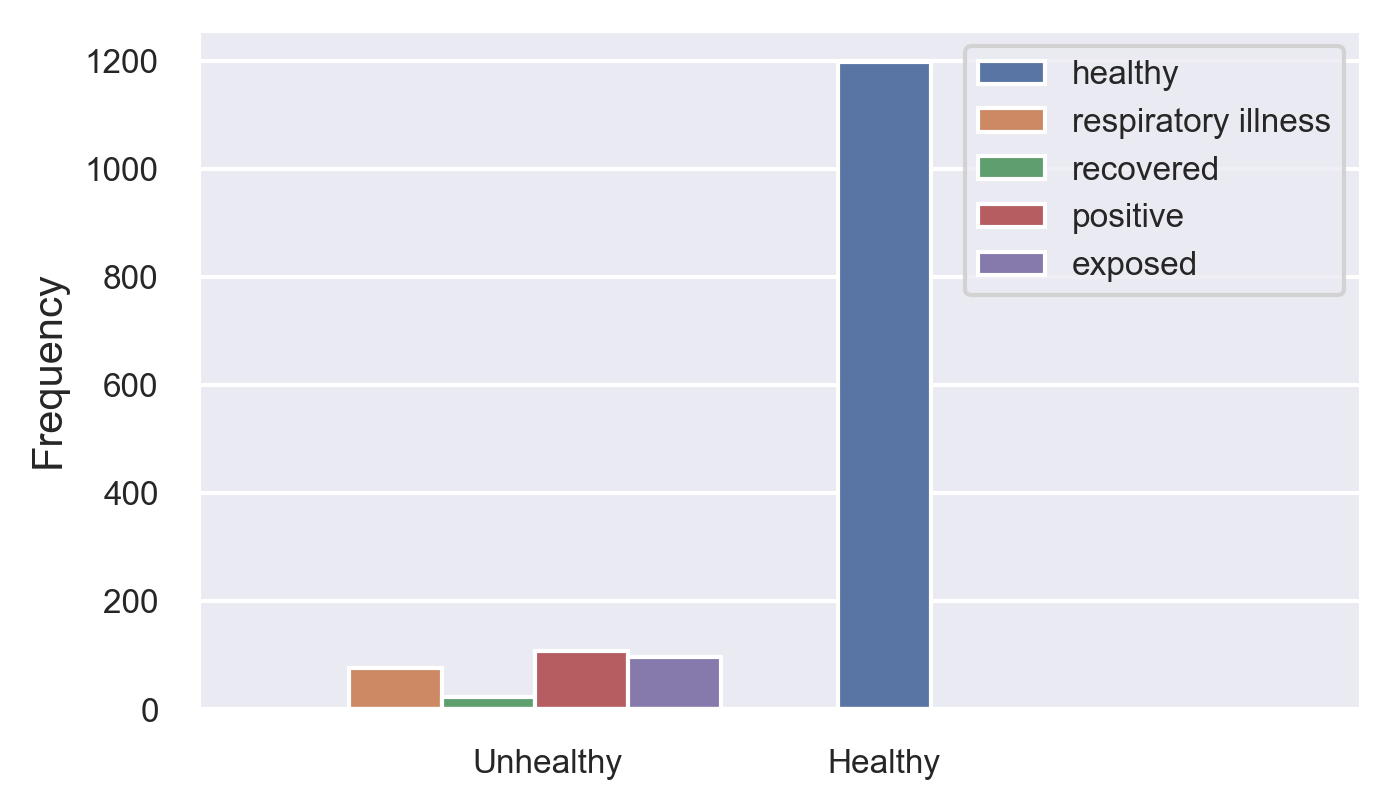

In [12]:
# plot number of subjects according to healthy status

fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(ax=ax, x="healthy",\
              hue="status_regroup", hue_order=["healthy","resp_illness","recovered","positive","exposed"], data=dmg)
ax.set(ylabel="Frequency",xlabel="")
plt.xticks([0.1,0.68],["Unhealthy","Healthy"])
plt.legend(loc='upper right', labels=["healthy","respiratory illness","recovered","positive","exposed"])
plt.show(ax)

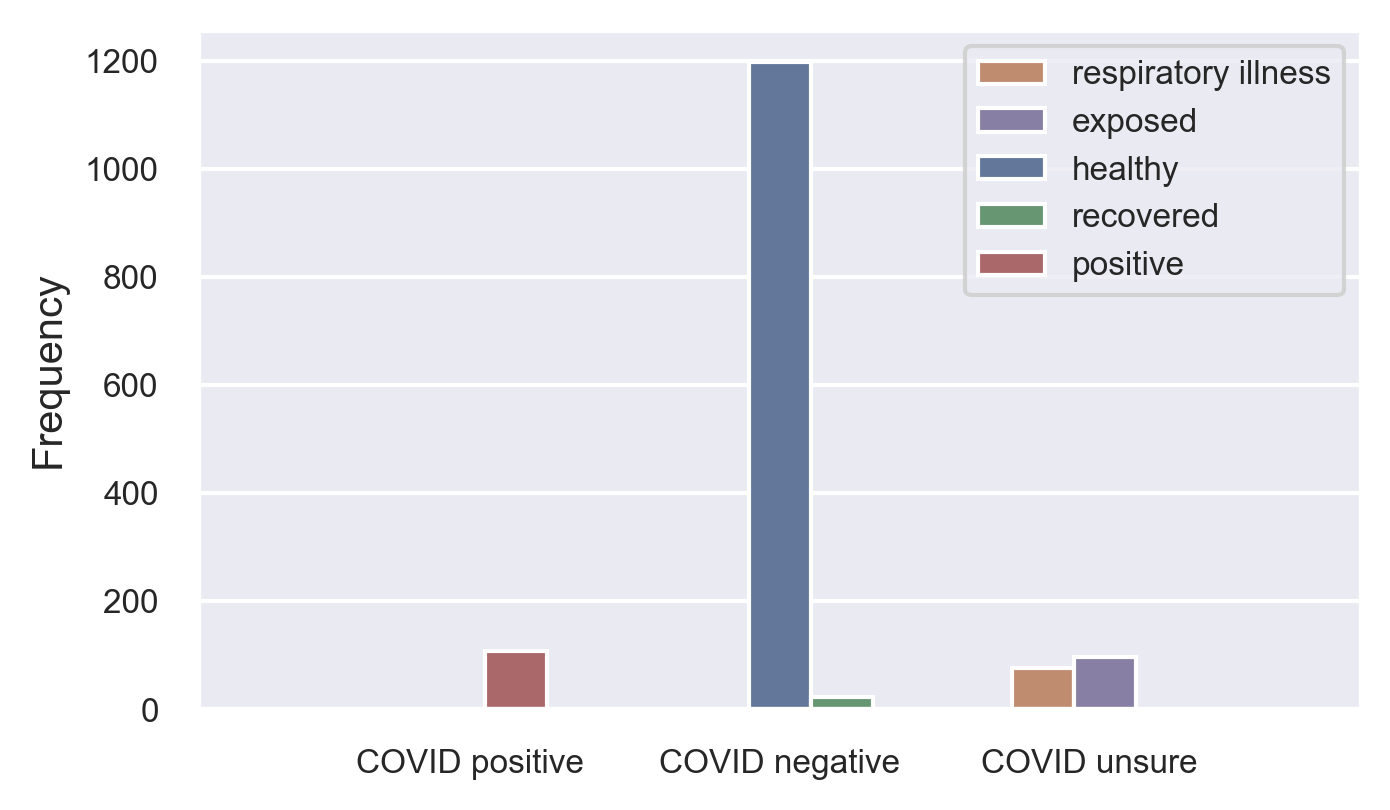

In [14]:
# plot number of subjects according to covid status (positive, negative, unsure)

palette = sns.color_palette(["orange","purple","blue","green","red"])
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(ax=ax, x="covid_neg", order=[0,1,2],\
              hue="status_regroup", hue_order=["resp_illness","exposed","healthy","recovered","positive"],\
              palette=["#cc8962","#857aaa","#5a75a4","#5f9e6e","#b65d60"], data=dmg)
ax.set(ylabel="Frequency",xlabel="")
plt.xticks([0.2,1,1.8],["COVID positive","COVID negative","COVID unsure"])
plt.legend(loc='upper right', labels=["respiratory illness","exposed","healthy","recovered","positive"])
plt.show(ax)

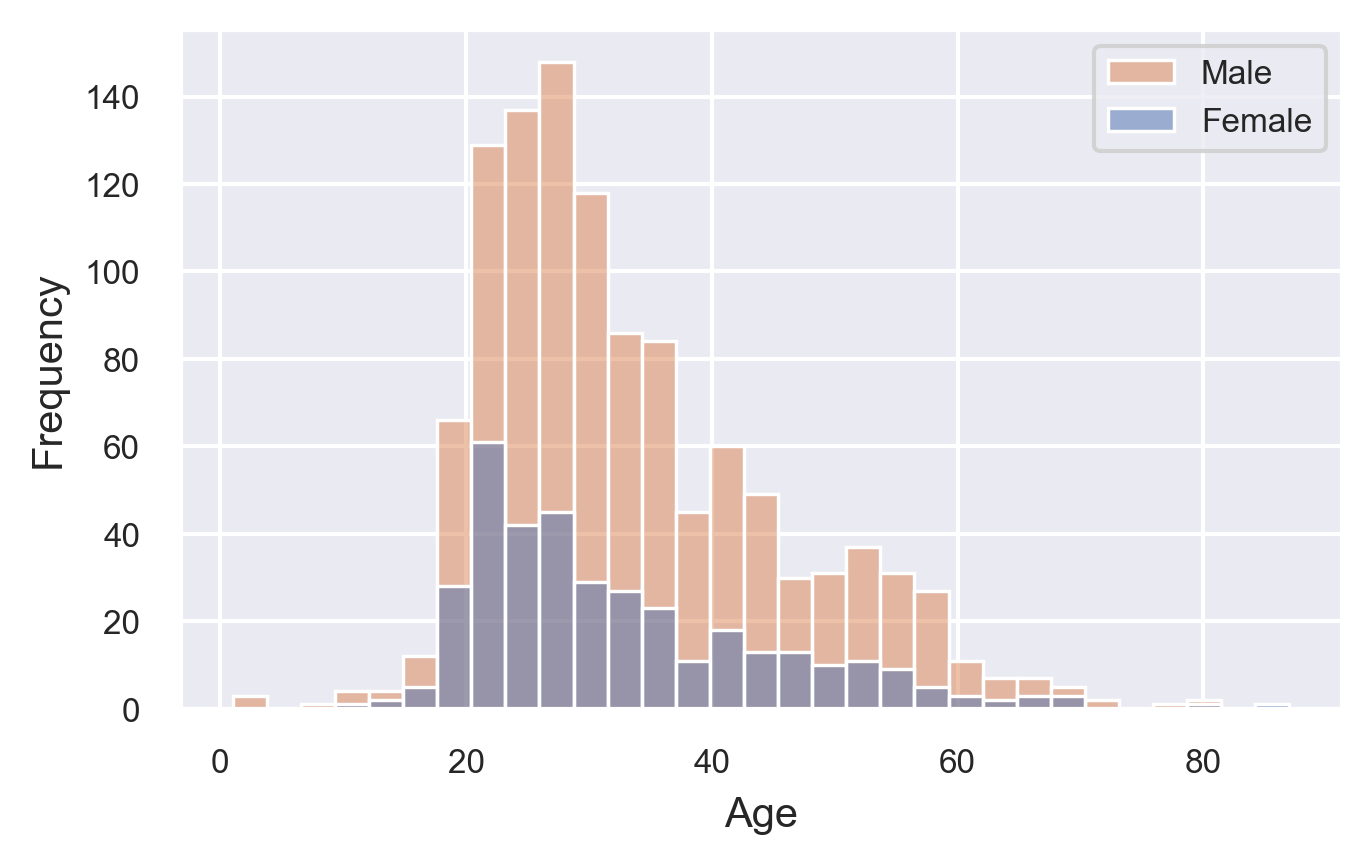

In [15]:
# plot the age distribution of subjects by gender

fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(ax=ax, data=dmg, x="a", hue="g", legend = False)
ax.set(ylabel="Frequency",xlabel="Age")

plt.legend(loc='upper right', labels=['Male', 'Female'])
plt.show(ax)

In [16]:
# create a dataframe for the instances of each symptoms under different covid status categories

symps = ["cough","diarrhoea","bd","st","fever","ftg","mp","loss_of_smell"]

symps_df = pd.DataFrame(columns=["name","count","healthy_count","unhealthy_count"])
symps_df["name"] = symps
for symp in symps:
    symps_df.loc[symps_df["name"]==symp,"count"] = len(dmg.loc[dmg[symp]==True].index)
    symps_df.loc[symps_df["name"]==symp,"healthy_count"] = len(dmg.loc[(dmg[symp]==True)&(dmg["healthy"]==1)].index)
    symps_df.loc[symps_df["name"]==symp,"unhealthy_count"] = len(dmg.loc[(dmg[symp]==True)&(dmg["healthy"]==0)].index)
    symps_df.loc[symps_df["name"]==symp,"cpos_count"] = len(dmg.loc[(dmg[symp]==True)&(dmg["covid_pos"]==1)].index)
    symps_df.loc[symps_df["name"]==symp,"cneg_count"] = len(dmg.loc[(dmg[symp]==True)&(dmg["covid_pos"]==0)].index)
symps_df["c_count"] = symps_df["cpos_count"]+symps_df["cneg_count"]


In [17]:
symps_df

,name,count,healthy_count,unhealthy_count,cpos_count,cneg_count,c_count
0,cough,102,38,64,47.0,40.0,87.0
1,diarrhoea,1,1,0,0.0,1.0,1.0
2,bd,20,4,16,12.0,5.0,17.0
3,st,51,9,42,31.0,9.0,40.0
4,fever,59,11,48,38.0,14.0,52.0
5,ftg,27,3,24,18.0,5.0,23.0
6,mp,26,5,21,14.0,7.0,21.0
7,loss_of_smell,21,2,19,13.0,2.0,15.0


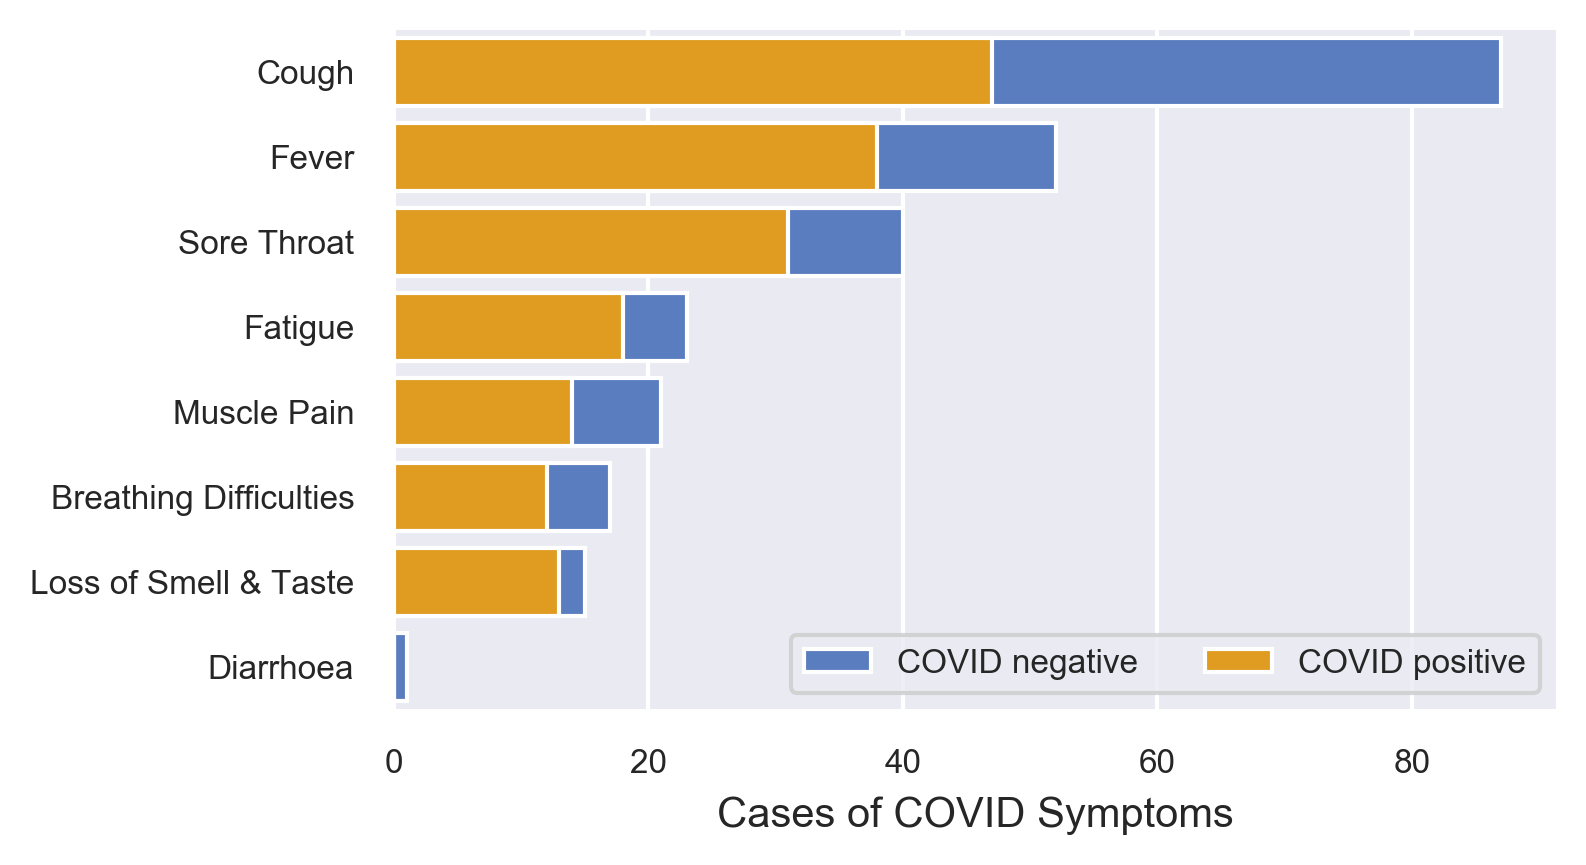

In [19]:
# plot the number of symptoms in covid positive and negative population, order by the frequency of the symptoms

fig, ax = plt.subplots(figsize=(5, 3))
symps_df = symps_df.sort_values("c_count", ascending=False)

sns.set_color_codes("muted")
sns.barplot(x="c_count", y="name", data=symps_df,
            label="COVID negative",color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="cpos_count", y="name", data=symps_df,
            label="COVID positive",color="orange")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Cases of COVID Symptoms")
ax.set_yticklabels(["Cough","Fever","Sore Throat","Fatigue","Muscle Pain",\
               "Breathing Difficulties","Loss of Smell & Taste","Diarrhoea"])
sns.despine(left=True, bottom=True)

In [20]:
# reset font sizes for the figure 

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

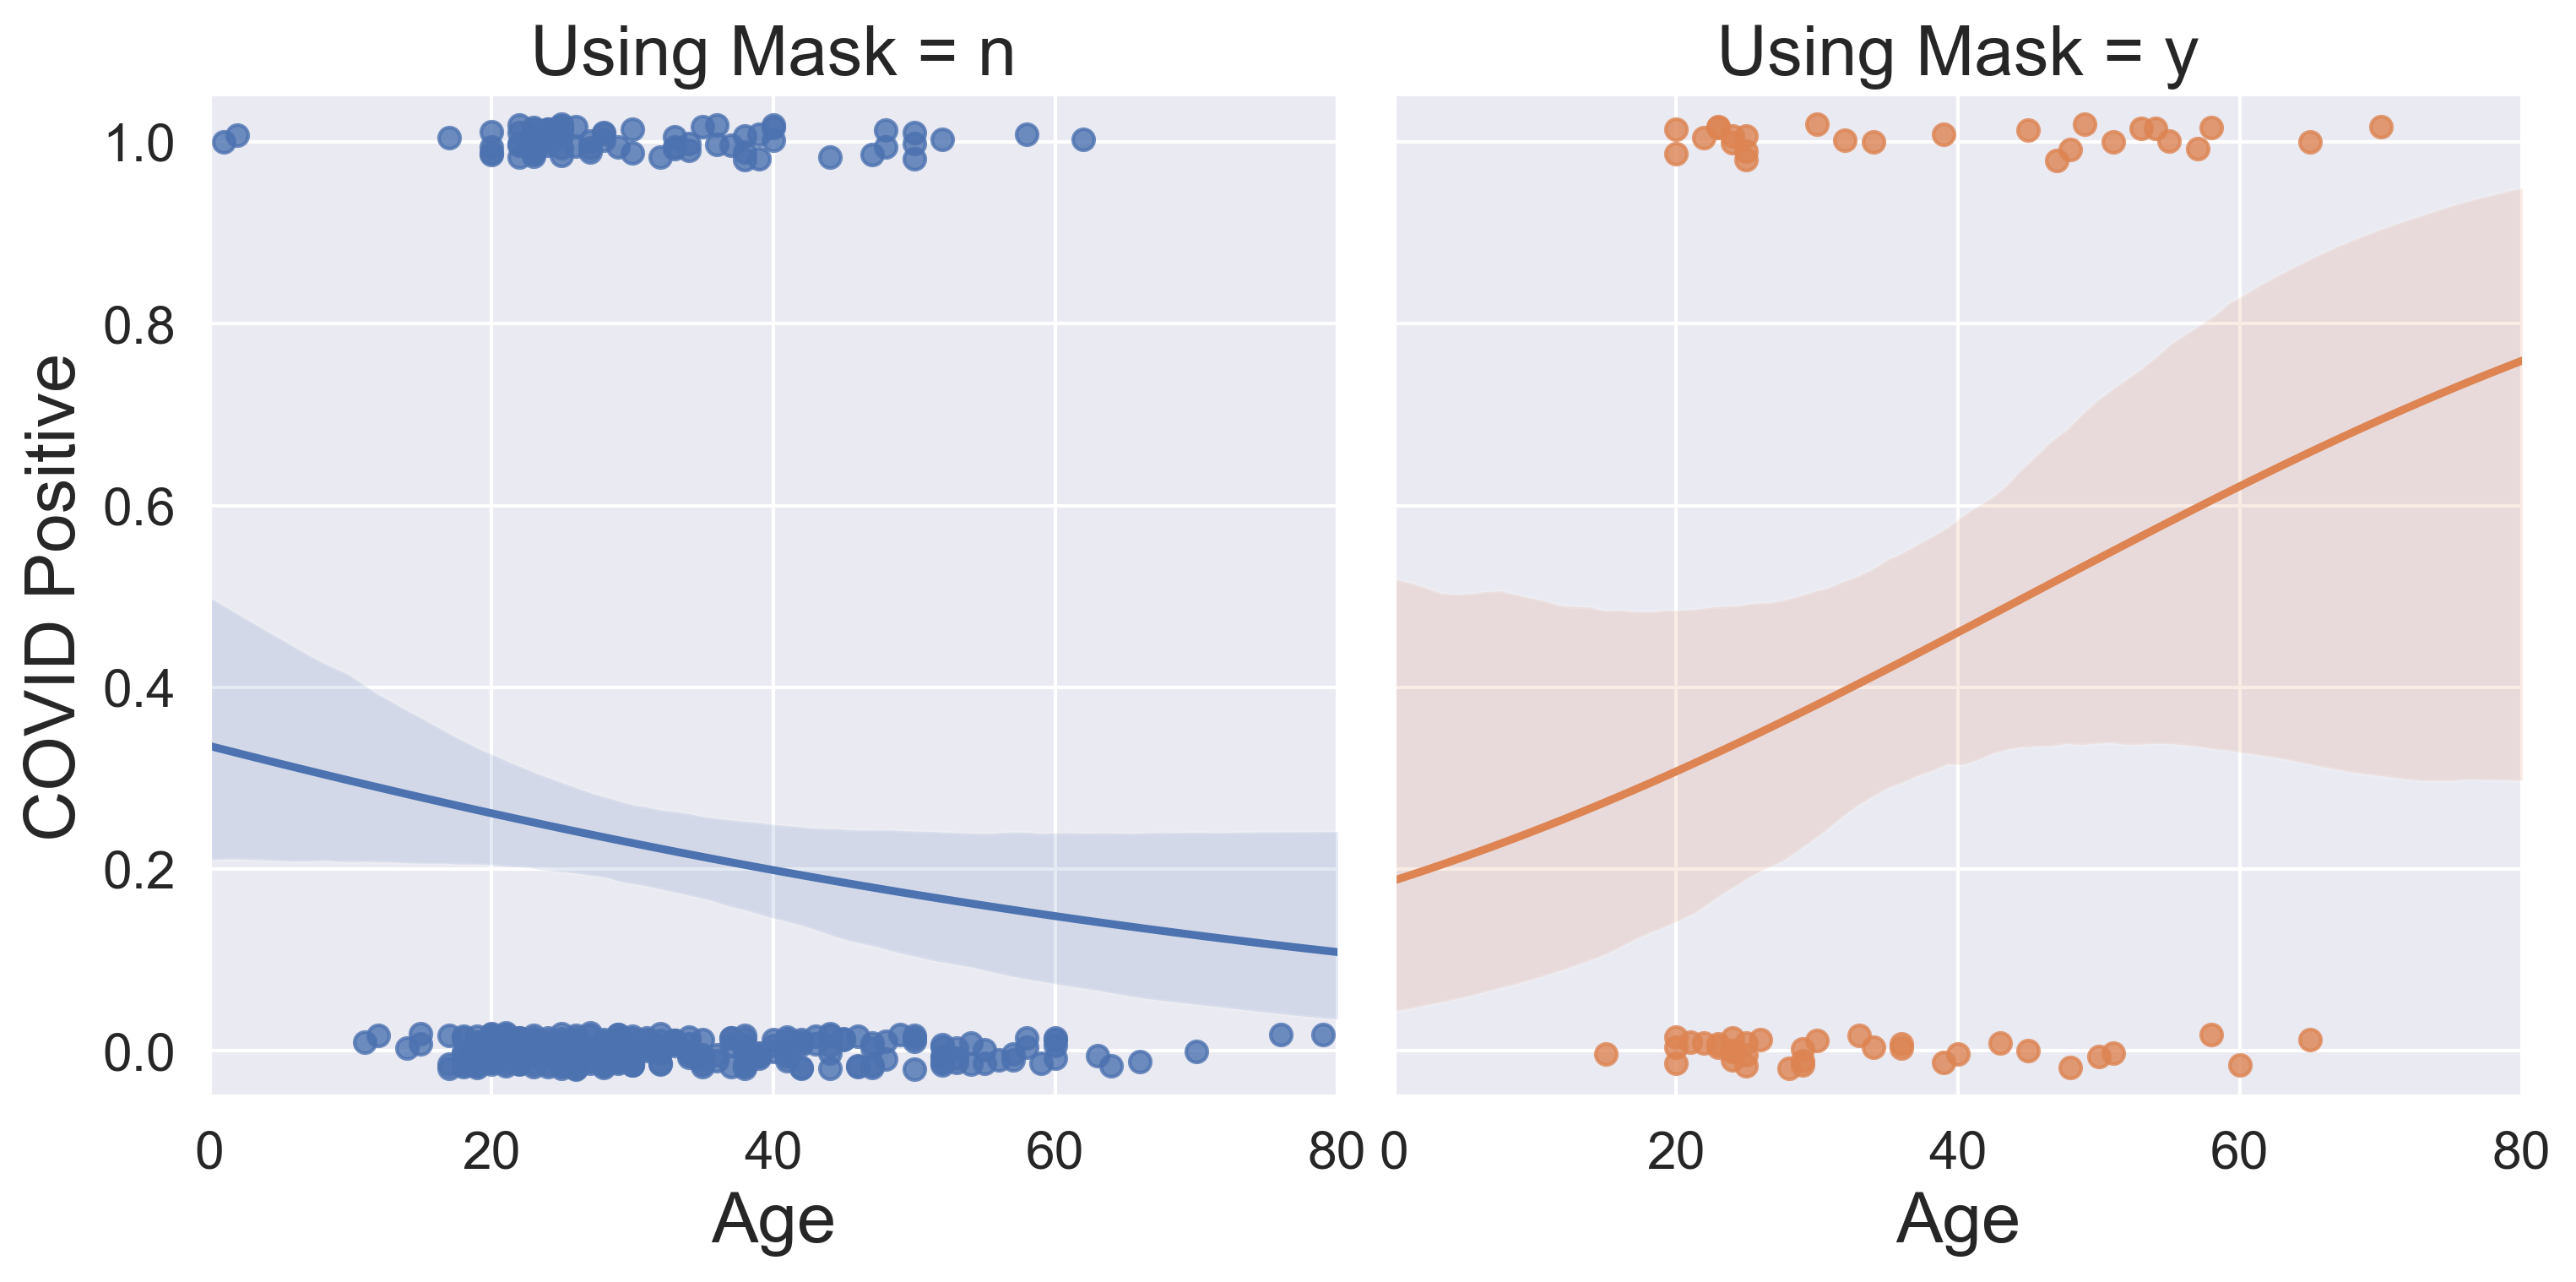

In [21]:
# logistic regression plot on the relationship between age and covid positive cases by mask usage

dmg["Using Mask"] = dmg["um"]
ax = sns.lmplot(x="a", y="covid_pos", col="Using Mask", hue="um", data=dmg,
               y_jitter=.02, logistic=True, truncate=False, legend=False)
ax.set(xlim=(0, 80), ylim=(-.05, 1.05))
ax = (ax.set_axis_labels("Age", "COVID Positive"))